In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)
print(matplotlib.__version__)

1.24.3
1.5.3
0.12.2
3.7.1


In [2]:
# Try reading the CSV with a specific encoding
try:
    df = pd.read_csv('UpdatedResume_DataSet.csv', encoding='utf-8')
except UnicodeDecodeError:
    # If utf-8 fails, try another common encoding
    df = pd.read_csv('UpdatedResume_DataSet.csv', encoding='latin-1')

# Display the DataFrame
print(df.head())

       Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \nMay 2013 to May 2017 B.E  ...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â?¢ R â?¢ Python â?¢ SAP HANA â?¢ Table...
4  Data Science  Education Details \n MCA   YMCAUST,  Faridabad...


In [35]:
df.head(2)

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...


In [3]:
df.shape

(962, 2)

In [4]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

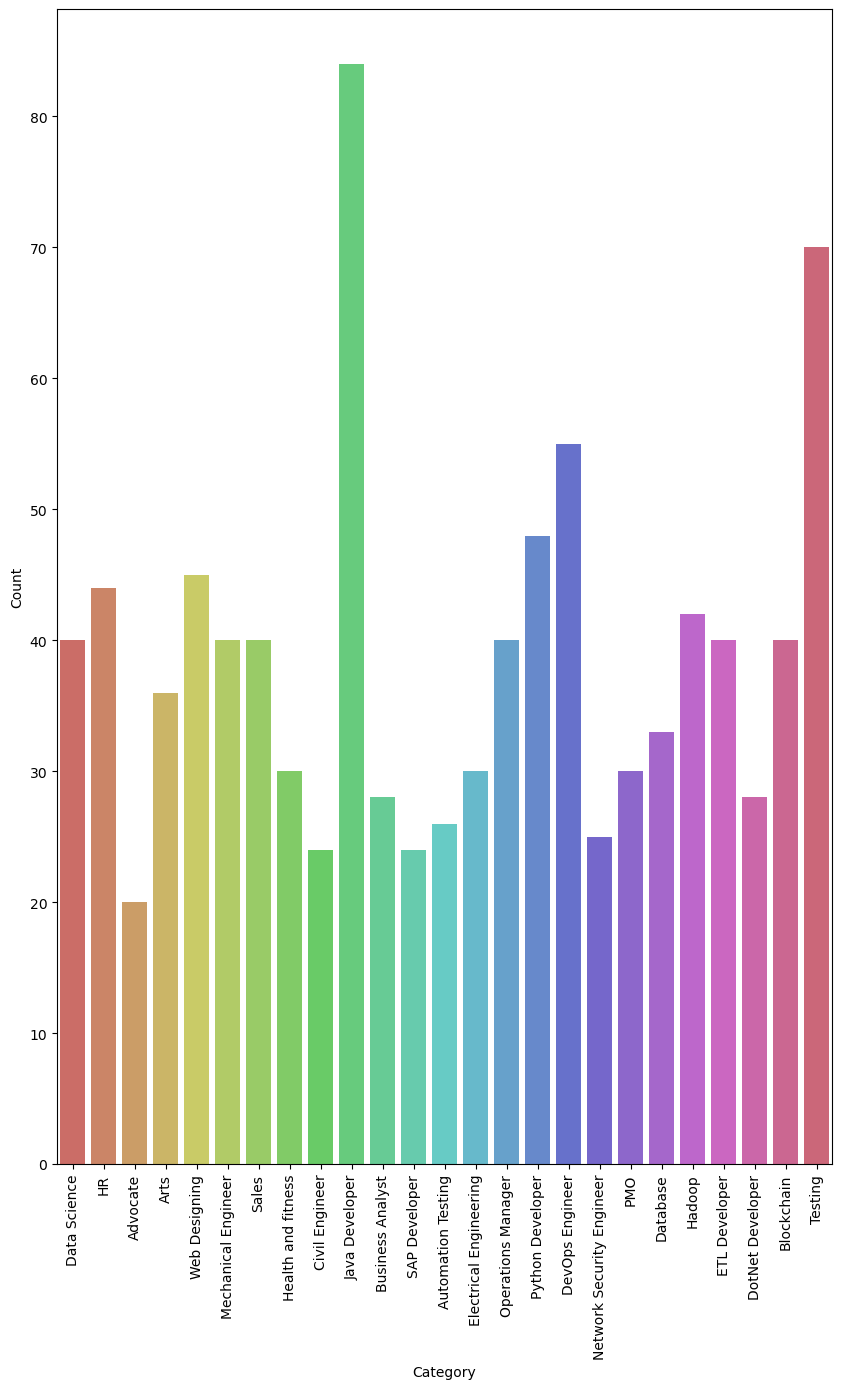

In [5]:
plt.figure(figsize=(10,15))
# sns_plot = sns.countplot(x=df['Category'])
sns_plot = sns.countplot(x=df['Category'], palette='hls')

# Increase the size of the x and y labels
sns_plot.set_xlabel('Category')
sns_plot.set_ylabel('Count')

# Increase the size of the tick labels
sns_plot.tick_params(axis='x')
sns_plot.tick_params(axis='y')

plt.xticks(rotation=90)
plt.show()

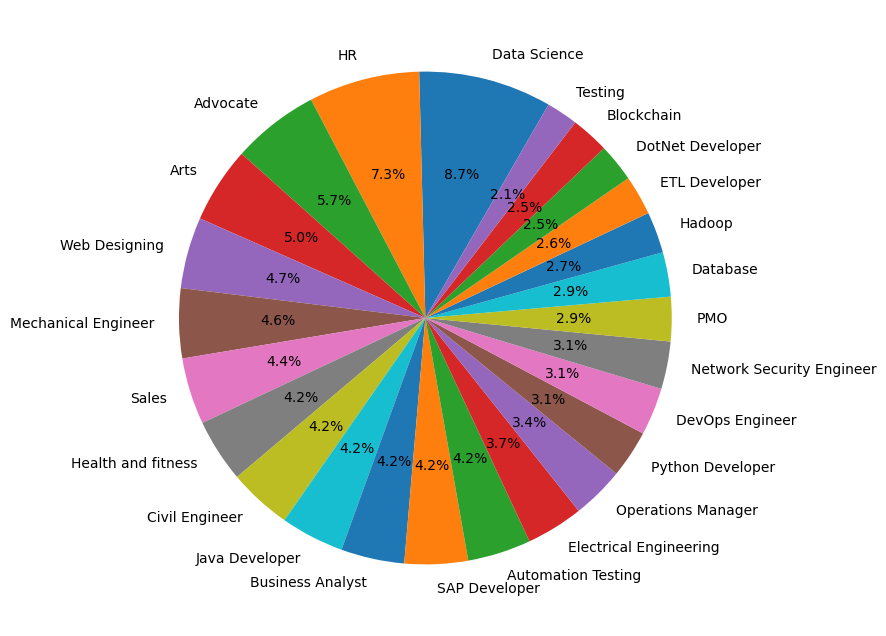

In [6]:
counts=df['Category'].value_counts()
labels=df['Category'].unique()
plt.figure(figsize=(12,8))
plt.pie(counts,labels=labels, autopct='%1.1f%%',startangle=60)
plt.show()

In [7]:
df.columns

Index(['Category', 'Resume'], dtype='object')

In [8]:
df['Resume'][2]

'Areas of Interest Deep Learning, Control System Design, Programming in-Python, Electric Machinery, Web Development, Analytics Technical Activities q Hindustan Aeronautics Limited, Bangalore - For 4 weeks under the guidance of Mr. Satish, Senior Engineer in the hangar of Mirage 2000 fighter aircraft Technical Skills Programming Matlab, Python and Java, LabView, Python WebFrameWork-Django, Flask, LTSPICE-intermediate Languages and and MIPOWER-intermediate, Github (GitBash), Jupyter Notebook, Xampp, MySQL-Basics, Python Software Packages Interpreters-Anaconda, Python2, Python3, Pycharm, Java IDE-Eclipse Operating Systems Windows, Ubuntu, Debian-Kali Linux Education Details \nJanuary 2019 B.Tech. Electrical and Electronics Engineering  Manipal Institute of Technology\nJanuary 2015    DEEKSHA CENTER\nJanuary 2013    Little Flower Public School\nAugust 2000    Manipal Academy of Higher\nDATA SCIENCE \n\nDATA SCIENCE AND ELECTRICAL ENTHUSIAST\nSkill Details \nData Analysis- Exprience - Less 

In [14]:
import re
import string
from nltk.corpus import stopwords  # Import stopwords from NLTK

def clean_resume(text):
    """
    This function cleans a resume text by removing stopwords and special characters.
    Args:
        text: The text of the resume document.
    Returns:
        A string containing the cleaned resume text.
    """
    # Lowercase the text
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove stopwords (using NLTK stopwords for English)
    stop_words = stopwords.words('english')
    text = ' '.join([word for word in text.split() if word not in stop_words])

    # Remove extra whitespace
    text = ' '.join(text.split())

    return text

# Example usage
resume_text = "This is a sample resume with stopwords and special characters!@#$%^"
cleaned_text = clean_resume(resume_text)
print(cleaned_text)

sample resume stopwords special characters


In [15]:
import re
def clean_resume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [25]:
df['Resume']=df['Resume'].apply(lambda x: clean_resume(x))
df['Resume']

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958     Willingness to a ept the challenges Positive ...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: Resume, Length: 962, dtype: object

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
le.fit(df['Category'])
df['Category']=le.transform(df['Category'])

In [28]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23], dtype=int64)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words='english')
tfidf.fit(df['Resume'])
required_text=tfidf.transform(df['Resume'])

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(required_text, df['Category'],test_size=0.3,random_state=30)

In [31]:
X_train.shape

(673, 7351)

In [32]:
X_test.shape

(289, 7351)

In [33]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# KNN model with OneVsRest strategy
clf=OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
score=accuracy_score(y_test,y_pred)
score

0.9688581314878892

In [37]:
# Logistic Regression model with OneVsRest strategy
from sklearn.linear_model import LogisticRegression
model = OneVsRestClassifier(LogisticRegression())
model.fit(X_train,y_train)
y_pred=clf.predict(X_test)
score=accuracy_score(y_test,y_pred)
score

0.9688581314878892

In [38]:
model =LogisticRegression()
model.fit(X_train,y_train)
y_pred=clf.predict(X_test)
score=accuracy_score(y_test,y_pred)
score

0.9688581314878892

In [39]:
from sklearn.model_selection import cross_val_score

# Logistic Regression cross-validation
logreg_cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Logistic Regression CV Accuracy: ", logreg_cv_scores.mean())

# KNN cross-validation
knn_cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
print("KNN CV Accuracy: ", knn_cv_scores.mean())

Logistic Regression CV Accuracy:  0.9895964621337756
KNN CV Accuracy:  0.961404090657822


In [40]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Logistic Regression
logreg_cv_scores = cross_val_score(model, X_train, y_train, cv=5)
logreg_train_accuracy = model.score(X_train, y_train)
logreg_test_accuracy = model.score(X_test, y_test)

print(f"Logistic Regression - Train Accuracy: {logreg_train_accuracy}")
print(f"Logistic Regression - Test Accuracy: {logreg_test_accuracy}")
print(f"Logistic Regression - Cross-validation Accuracy: {logreg_cv_scores.mean()}")

# Cross-validation for KNN
knn_cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
knn_train_accuracy = clf.score(X_train, y_train)
knn_test_accuracy = clf.score(X_test, y_test)

print(f"KNN - Train Accuracy: {knn_train_accuracy}")
print(f"KNN - Test Accuracy: {knn_test_accuracy}")
print(f"KNN - Cross-validation Accuracy: {knn_cv_scores.mean()}")


Logistic Regression - Train Accuracy: 1.0
Logistic Regression - Test Accuracy: 0.9826989619377162
Logistic Regression - Cross-validation Accuracy: 0.9895964621337756
KNN - Train Accuracy: 0.9836552748885586
KNN - Test Accuracy: 0.9688581314878892
KNN - Cross-validation Accuracy: 0.961404090657822


In [42]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(model, open('clf.pkl', 'wb'))

In [43]:
myresume =''''Good grasping quality and skillful work Education Details March 2013 to 
March 2018 B A LL B Law Solapur Maharashtra Solapur University Advocate Skill Details 
Good knowledge of typing as well as many other activities Exprience Less than 1 year months
Company Details company District and Session court of solapur description Forward thinking 
individual with refined interpersonal and multitasking skills Looking to join a progressive 
organization to provide assistance in Legal work company District and 
Session court of solapur description Provide legal assistance in legal work'''

In [44]:
# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))
# Clean the input resume
cleaned_resume = clean_resume(myresume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: Advocate
0
